### **檔案說明**
* 此ipynb檔案旨在：在自己的資料集上訓練，在別人的資料集做測試

* `20240611_eric_2.xls`與`20240611_eric_2.csv`分別是IMU的轉換前和轉換後的檔案

* `20240611_ECU_eric.txt`與`20240611_ECU_eric.csv`分別是ECU的原始txt檔與解碼後的csv檔

* `20240611_Eric_merged.csv`為ECU與IMU合併後的csv檔

* `20240611_eric_2_only_mark.csv`與`20240611_kino_only_mark.csv`為IMU與ECU合併之後，校正之前，長度因此縮短的標記column單獨存檔(我用Excel來製作)，一個用於訓練，一個用於測試

* `20240611_Eric_model.pkl`為資料分群後的群中心模型

* `Ridetrack_Eric_v1.py`為函數呼叫的主要程式檔案

* `20240611_Eric_clustered.csv`為用訓練好的群中心模型去預測數據的駕駛行為

### **一、導入函式庫**

In [1]:
# 載入要使用的函式庫
import pandas as pd
import Ridetrack_Eric_v1
SensorFusion = Ridetrack_Eric_v1.SensorFusion()
AutoTag = Ridetrack_Eric_v1.AutoTag()
DrivePSTs = Ridetrack_Eric_v1.DrivePSTs()
else_ = Ridetrack_Eric_v1.else_()

### **二、定義訓練與測試資料的路徑**

In [3]:
# 這裡修改個人的IMU與ECU的資料路徑 (不需要副檔名)
# train
train_imu_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_eric_2_sliding_window',  # 若不使用 r，反斜線需要雙寫"\\"
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_kino_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_kino_sliding_window'
]

train_ecu_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_ECU_eric',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_ECU_kino',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_kino_ECU'
]

train_label_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_eric_2_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240611_data\20240611_kino_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_kino_only_mark.csv'
]

# test
test_imu_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_eric_2_sliding_window'
test_ecu_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_eric_2_ECU'
test_label_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_eric_2_only_mark'

train_name_file = r'mixed_data\mixed_train'  # 命名用
test_name_file = r'mixed_data\20240702_Eric_test'  # 命名用

# 一開始閒置的時間(merge完後的檔案：開始幾筆snapshot是Idle)(校正角速度用)
k = 1

### **三、處理訓練資料**

In [ ]:
for imu_file, ecu_file, label_file in zip(train_imu_file, train_ecu_file, train_label_file):
       print(f'Processing files: {imu_file}, {ecu_file}, {label_file}')
       # SensorFusion.Axis_Process(f'{train_imu_file}.xls', f'{train_imu_file}.csv', app_time_error=0)
       # SensorFusion.ECU_Reverse(f'{train_ecu_file}.txt', f'{train_ecu_file}.csv')
       SensorFusion.Data_Merge(f'{ecu_file}.csv', f'{imu_file}.csv',  f'{imu_file}_merged.csv')

       df = pd.read_csv(f'{imu_file}_merged.csv')
       SensorFusion.calibrate_angles(df, f'{imu_file}_merged.csv')

       df = pd.read_csv(f'{imu_file}_merged.csv')
       SensorFusion.calibrate_imu(df, k, f'{imu_file}_merged.csv')

       feature = ['Atmospheric Pressure', 'Inclination Switch',
              'Fault Code Count', 'Ignition Coil Current Diagnosis',
              'Fault Light Mileage',
              'Ignition Advance Angle', 'Idling Correction Ignition Angle',
              'Fuel Injection Prohibition Mode', 'Injection Mode',
              'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
              'Lambda Setting', 'Air-Fuel Ratio Rich',
              'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
              'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
              'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
              'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
              'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
              'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
              'Engine Temperature', 'Water Temperature PWM',
              'Ignition Magnetization Time', 'Fuel Injection Time',
              'Closed Loop Fuel Correction', 'Intake Temperature',
              'Combustion Chamber Intake Temperature', 'TPS Opening',
              'TPS Idling Learning Value', 'Battery Voltage', 'O2 Voltage',
              'Vehicle Speed', 'TPS Voltage', 
              'X-axis Angular Velocity', 'Y-axis Angular Velocity',
              'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
              'Z-axis Acceleration', 'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)']

       df = pd.read_csv(f'{imu_file}_merged.csv')
       SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path=f'{imu_file}_merged.csv')

       # 合併CSV檔案
       if imu_file == train_imu_file[0]:
              df_combined = pd.DataFrame()  # 初始化一個空的 DataFrame

       # 依序合併 CSV 檔案
       df = pd.read_csv(f'{imu_file}_merged.csv')
       if df_combined.empty:
              df_combined = df
       else:
              df_combined = pd.concat([df_combined, df], axis=0)  # 合併兩個 DataFrame，axis=0 表示按行合併
       
       # 儲存合併後的 DataFrame 為新的 CSV 檔案
       df_combined = df_combined.drop(columns=['ECU Absolute Time', 'Absolute Time'])
       df_combined.to_csv(f'{train_name_file}.csv', index=False)

In [8]:
df = pd.read_csv(f'{train_name_file}.csv')

feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)', 'Vehicle Speed']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']

# 利用k-means進行分群以得到群中心模型
AutoTag.cluster_data(df, feature, method="kmeans", n_clusters=11, model_path=f'{train_name_file}_model.pkl', save_path=f'{train_name_file}.csv')

# df_train = pd.read_csv(f'{train_name_file}.csv')
# train_label = pd.read_csv(f'{train_label_file}.csv', skip_blank_lines=False)  # skip_blank_lines=False 要把空白值算入
# df_train['Action'] = train_label['Action']

Execution time: 0.0 hours 0.0 minutes 8.261934518814087 seconds


,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,Injection Mode,Bypass Delay Correction,...,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,Pitch (deg),Roll (deg),Yaw (deg),Action,Action Element
0,1000.999101,0.756745,0.0,0.078047,0.0,10.770055,-0.468590,0.000000e+00,4.995005,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.312725,-0.666152,0.067331,Idle,4
1,1001.523155,0.757141,0.0,0.078088,0.0,10.775693,-0.468836,0.000000e+00,4.997621,0.0,...,0.113782,-0.010040,-2.720232,0.649346,2.855616,-0.258774,-0.360747,0.083898,Idle,4
2,1001.706301,0.757280,0.0,0.078102,0.0,11.137733,-0.108852,0.000000e+00,4.998534,0.0,...,0.158047,-0.036869,-1.199117,-1.871369,2.674719,-0.192785,-0.422354,0.055426,Idle,4
3,1001.802100,0.757352,0.0,0.078109,0.0,11.327108,0.079447,0.000000e+00,4.999012,0.0,...,0.228804,-0.060285,-1.407752,-2.907192,3.778063,-0.027719,-0.415083,-0.007675,Idle,4
4,1001.861238,0.757397,0.0,0.078114,0.0,11.444010,0.195686,0.000000e+00,4.999308,0.0,...,0.156930,-0.041952,-0.776736,-1.637793,2.435872,-0.025819,-0.548946,-0.024771,Idle,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112236,1003.000000,0.762389,0.0,0.077587,0.0,9.002553,-2.247329,8.440308e-41,5.000000,0.0,...,-0.101036,-0.011645,-1.255826,2.162925,2.654087,-1.142064,-0.152789,0.780163,Idle,4
112237,1003.000000,0.762389,0.0,0.077732,0.0,8.976426,-2.273456,6.160106e-41,5.000000,0.0,...,-0.132701,-0.006340,-1.538787,1.256487,3.583843,-1.171198,-0.304447,0.783192,Idle,4
112238,1003.000000,0.762389,0.0,0.077838,0.0,8.957358,-2.292525,4.495915e-41,5.000000,0.0,...,-0.077533,-0.005347,-0.936793,3.407252,1.455272,-0.996359,-0.615453,0.751607,Idle,4
112239,1003.000000,0.762389,0.0,0.077916,0.0,8.943441,-2.306442,3.281316e-41,5.000000,0.0,...,-0.078711,0.003148,-1.206334,1.332855,2.607993,-0.908310,-0.874601,0.738950,Idle,4


### **四、處理測試資料**

In [9]:
# Process testing data
# SensorFusion.Axis_Process(f'{test_imu_file}.xls', f'{test_imu_file}.csv', app_time_error=4)
# SensorFusion.ECU_Reverse(f'{test_ecu_file}.txt', f'{test_ecu_file}.csv')
SensorFusion.Data_Merge(f'{test_ecu_file}.csv', f'{test_imu_file}.csv',  f'{test_name_file}_merged.csv')

df = pd.read_csv(f'{test_name_file}_merged.csv')
SensorFusion.calibrate_angles(df, f'{test_name_file}_merged.csv')

df = pd.read_csv(f'{test_name_file}_merged.csv')
SensorFusion.calibrate_imu(df, k, f'{test_name_file}_merged.csv')

feature = ['Atmospheric Pressure', 'Inclination Switch',
       'Fault Code Count', 'Ignition Coil Current Diagnosis',
       'Fault Light Mileage',
       'Ignition Advance Angle', 'Idling Correction Ignition Angle',
       'Fuel Injection Prohibition Mode', 'Injection Mode',
       'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
       'Lambda Setting', 'Air-Fuel Ratio Rich',
       'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
       'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
       'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
       'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
       'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
       'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
       'Engine Temperature', 'Water Temperature PWM',
       'Ignition Magnetization Time', 'Fuel Injection Time',
       'Closed Loop Fuel Correction', 'Intake Temperature',
       'Combustion Chamber Intake Temperature', 'TPS Opening',
       'TPS Idling Learning Value', 'Battery Voltage', 'O2 Voltage',
       'Vehicle Speed', 'TPS Voltage', 
       'X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)']

df = pd.read_csv(f'{test_name_file}_merged.csv')
SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path=f'{test_name_file}_merged.csv')

# df = pd.read_csv(f'{test_name_file}_merged.csv')

feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
          'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)', 'Vehicle Speed']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']

# 利用k-means進行分群以得到群中心模型
AutoTag.cluster_data(df, feature, method="kmeans", n_clusters=11, model_path=f'{test_name_file}_model.pkl', save_path=f'{test_name_file}_merged.csv')

# df_test = pd.read_csv(f'{test_name_file}_merged.csv')
# test_label = pd.read_csv(f'{test_label_file}.csv', skip_blank_lines=False)  # skip_blank_lines=False 要把空白值算入
# df_test['Action'] = test_label['Action']

Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240702_data\20240702_eric_2_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 2253/2253 [00:03<00:00, 662.33it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 2253/2253 [00:06<00:00, 346.93it/s]


Execution time: 0.0 hours 0.0 minutes 17.18826150894165 seconds


Calibrating angle data: 100%|██████████| 26482/26482 [00:00<00:00, 276592.05it/s]


Execution time: 0.0 hours 0.0 minutes 1.1160149574279785 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2005.88it/s]


Execution time: 0.0 hours 0.0 minutes 1.0532135963439941 seconds


Applying Kalman filter: 100%|██████████| 26482/26482 [00:25<00:00, 1038.57it/s]


Execution time: 0.0 hours 0.0 minutes 27.288686990737915 seconds
Execution time: 0.0 hours 0.0 minutes 2.1711626052856445 seconds


,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,Injection Mode,...,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,Pitch (deg),Roll (deg),Yaw (deg),Absolute Time,Action,Action Element
0,2024-07-02 15:47:38.296782080+08:00,998.002098,0.761627,0.0,0.073169,0.0,11.706608,0.467963,0.000000e+00,4.995005,...,0.000000,0.000000,0.000000,0.000000,-0.156242,0.398111,-0.079523,2024-07-02 15:47:38.591571+08:00,NaN,10
1,2024-07-02 15:47:38.296782080+08:00,998.524582,0.762026,0.0,0.073207,0.0,11.712737,0.468208,0.000000e+00,4.997621,...,0.041274,0.127863,5.285022,-2.289006,-0.117067,0.231861,-0.042320,2024-07-02 15:47:38.611633+08:00,NaN,10
2,2024-07-02 15:47:38.634138112+08:00,998.707180,0.762165,0.0,0.075096,0.0,11.354809,0.108224,0.000000e+00,4.998534,...,0.042196,-0.347922,2.835840,0.063288,-0.107961,0.161147,-0.027927,2024-07-02 15:47:38.644967+08:00,NaN,10
3,2024-07-02 15:47:38.634138112+08:00,998.802692,0.762238,0.0,0.076084,0.0,11.167586,-0.080074,0.000000e+00,4.999012,...,0.059357,-0.415616,4.533250,-0.441540,-0.030791,-0.055809,0.012774,2024-07-02 15:47:38.678300+08:00,NaN,10
4,2024-07-02 15:47:38.634138112+08:00,998.861653,0.762283,0.0,0.076694,0.0,11.052011,-0.196313,0.000000e+00,4.999308,...,0.053716,-0.736429,2.963958,0.640523,-0.029377,-0.122394,0.037483,2024-07-02 15:47:38.711633+08:00,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,2024-07-02 16:02:20.937346816+08:00,1000.000000,0.762389,0.0,0.077586,0.0,12.502851,1.252968,5.742653e-143,5.000000,...,0.037743,0.117548,5.173977,-2.861195,-5.009547,3.760655,-0.211748,2024-07-02 16:02:21.144958+08:00,Idle,4
26478,2024-07-02 16:02:20.937346816+08:00,1000.000000,0.762389,0.0,0.077732,0.0,12.544172,1.294290,4.191240e-143,5.000000,...,0.035964,-0.541613,4.024569,-1.528089,-4.993699,3.744700,-0.227101,2024-07-02 16:02:21.178291+08:00,Idle,4
26479,2024-07-02 16:02:20.937346816+08:00,1000.000000,0.762389,0.0,0.077838,0.0,12.574330,1.324448,3.058950e-143,5.000000,...,0.034090,-0.172791,4.540098,-2.146279,-4.922079,3.657331,-0.221977,2024-07-02 16:02:21.211624+08:00,Idle,4
26480,2024-07-02 16:02:20.937346816+08:00,1000.000000,0.762389,0.0,0.077915,0.0,12.596341,1.346458,2.232556e-143,5.000000,...,0.035888,-0.199846,4.376916,-2.074840,-4.859493,3.589078,-0.201954,2024-07-02 16:02:21.244958+08:00,Idle,4


### **五、訓練與測試模型**

Training VoMM: 100%|██████████| 6/6 [00:28<00:00,  4.68s/it]


Execution time: 0.0 hours 0.0 minutes 28.774144649505615 seconds
Execution time: 0.0 hours 0.0 minutes 1.6306393146514893 seconds


Testing VoMM: 100%|██████████| 26482/26482 [06:03<00:00, 72.94it/s] 


Execution time: 0.0 hours 6.0 minutes 4.845440149307251 seconds
            index      Idle  Go Straight  Turn Right  Turn Left  \
0         Predict  1.404227     0.019704   83.622829  21.866667   
1  Filter_Predict  1.396914     0.000000   84.863524  21.866667   

   Two-Stage Left  U-turn  Accuracy (Total)  
0        1.754386     0.0          2.468395  
1        0.438596     0.0          2.464394  
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-Stage Left |   Predicted: U-turn |   Accuracy |
|:---------------|-------------------------:|------------------:|-----------------------:|------------------------:|----------------------------:|--------------------:|-----------:|
| Go Straight    |                        2 |               487 |                   2506 |                     152 |                          76 |                6927 |  0.0197044 |
| Idle           |                        0 |     

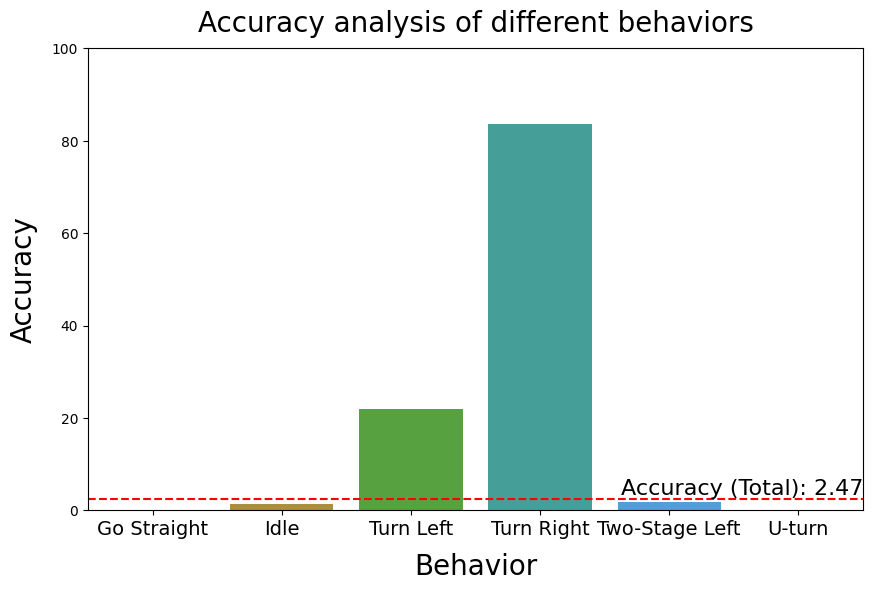

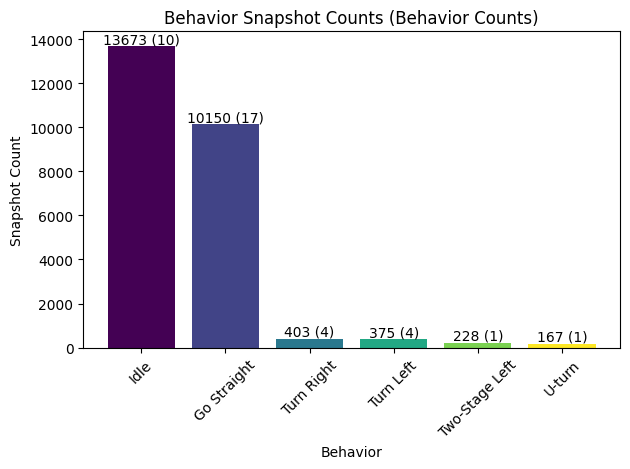

In [10]:
df_train = pd.read_csv(f'{train_name_file}.csv')
df_test = pd.read_csv(f'{test_name_file}_merged.csv')

DrivePSTs.train_vomm(df_train, 30, 11, False)

feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration',
           'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)', 'Vehicle Speed']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']

AutoTag.predict_cluster(df_test, feature, 'mixed_data/20240702_Eric_test_model.pkl', f'{test_name_file}_merged.csv')
Test_Data = DrivePSTs.test_vomm(df_test, 6, save_path=f'{test_name_file}_merged.csv')

Test_Data = Test_Data.dropna()

print(DrivePSTs.compute_accuracy(Test_Data, 6, None))
DrivePSTs.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Predict'], True)

else_.Calculate_behavior_count(f'{test_name_file}_merged.csv')

### **四、繪製資料點3D散佈圖**

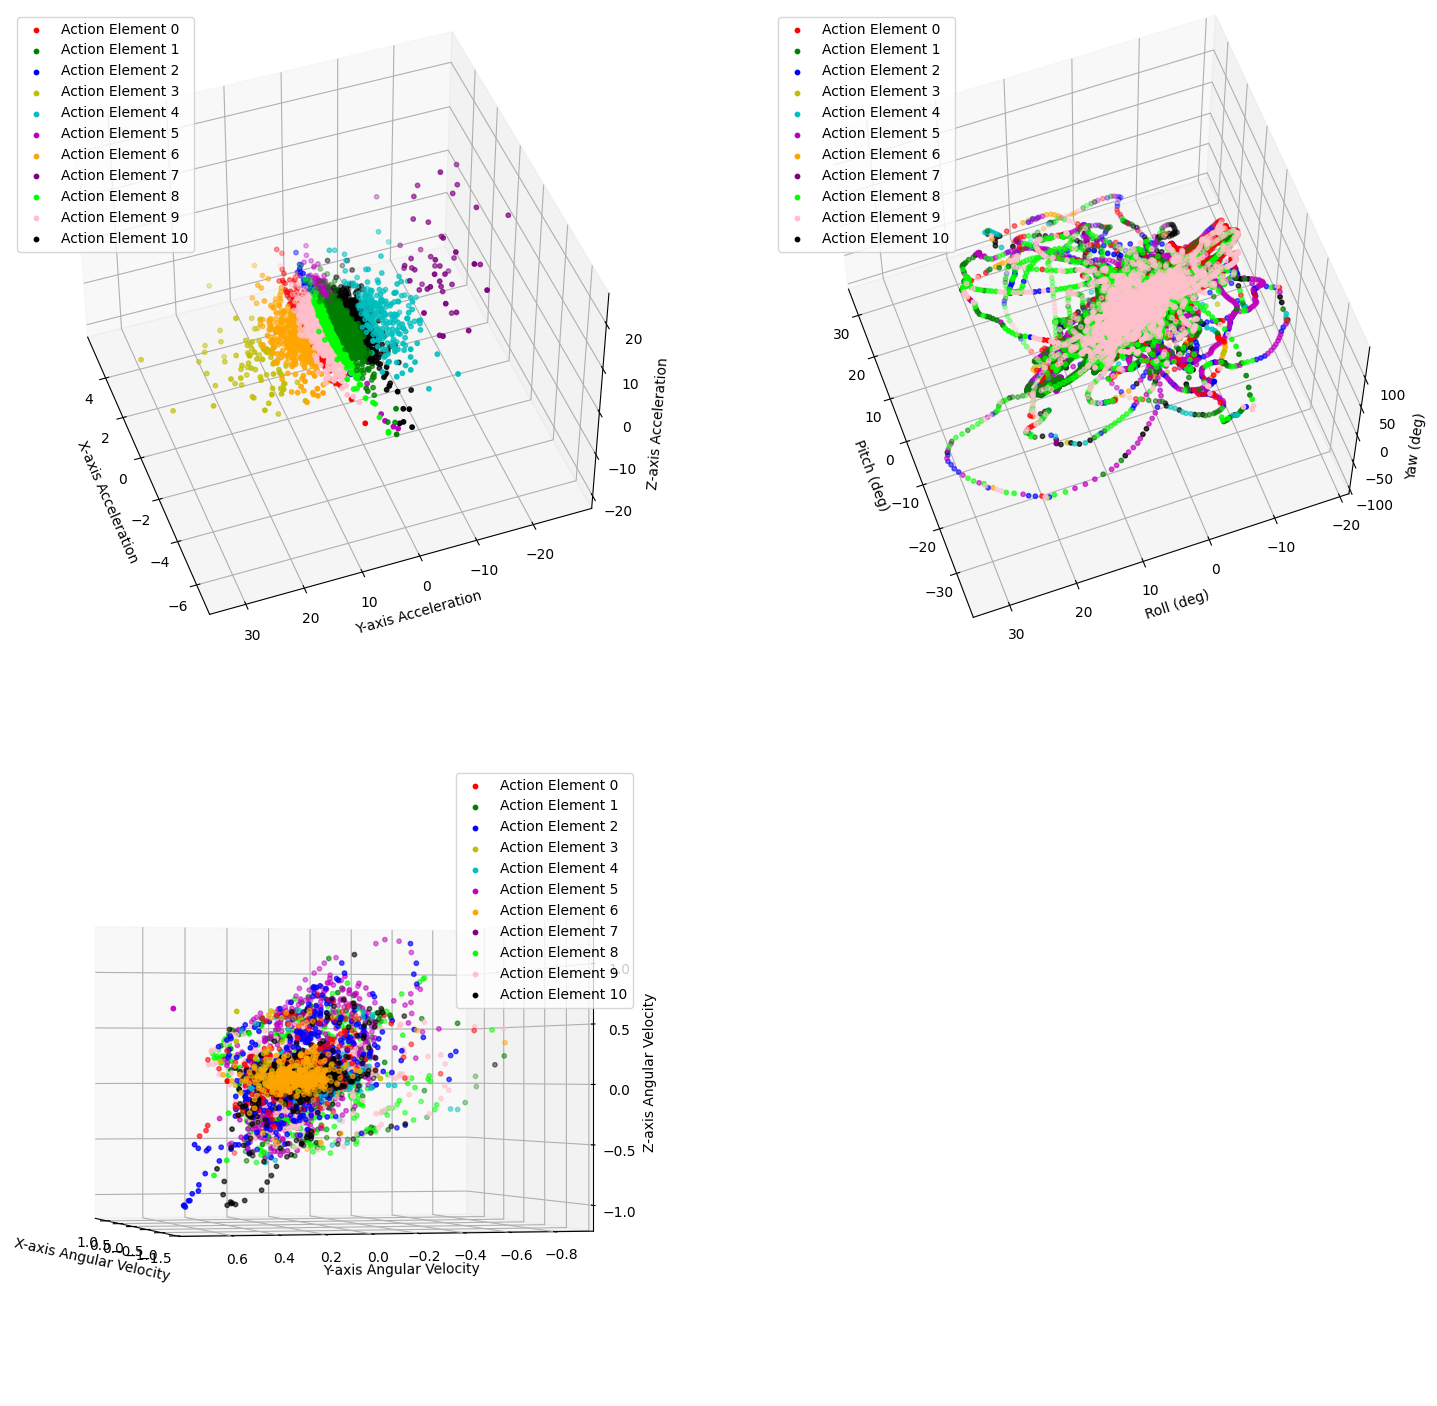

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load the provided CSV file
file_path = f'{test_name_file}_merged.csv'
data = pd.read_csv(file_path)

# Set up the 3D plot
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')

# Group data by 'Action Element' for color coding
groups = data.groupby('Action Element')

# Colors for each 'Action Element'
# colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink', 'k', 'grey']
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink', 'k']
# colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink']

# count = 0  # 為了畫2個群組而已
for (key, group), color in zip(groups, colors):
    ax.scatter(group['X-axis Acceleration'], group['Y-axis Acceleration'], group['Z-axis Acceleration'], c=color, label=f'Action Element {key}', s=10)
    # count += 1
    # if count >= 2:
    #     break

ax.set_xlabel('X-axis Acceleration')
ax.set_ylabel('Y-axis Acceleration')
ax.set_zlabel('Z-axis Acceleration')

for (key, group), color in zip(groups, colors):
    bx.scatter(group['Pitch (deg)'], group['Roll (deg)'], group['Yaw (deg)'], c=color, label=f'Action Element {key}', s=10)

bx.set_xlabel('Pitch (deg)')
bx.set_ylabel('Roll (deg)')
bx.set_zlabel('Yaw (deg)')

# count = 0  # 為了畫2個群組而已
for (key, group), color in zip(groups, colors):
    cx.scatter(group['X-axis Angular Velocity'], group['Y-axis Angular Velocity'], group['Z-axis Angular Velocity'], c=color, label=f'Action Element {key}', s=10)
    # count += 1
    # if count >= 2:
    #     break

cx.set_xlabel('X-axis Angular Velocity')
cx.set_ylabel('Y-axis Angular Velocity')
cx.set_zlabel('Z-axis Angular Velocity')

# Legend
ax.view_init(elev=45, azim=160)  # elev=45, azim=160
bx.view_init(elev=60, azim=160)
cx.view_init(elev=0, azim=165)

ax.legend()
bx.legend()
cx.legend()

plt.show()

### **五、繪製駕駛行為軌跡**

In [ ]:
import Ridetrack
else_ = Ridetrack.else_()

feature = ['Z-axis Angular Velocity', 'Z-axis Angle', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']

df = pd.read_csv(f'{name_file}_merged.csv')

AutoTag.predict_cluster(df, feature, '20240125_Eric_model.pkl', f'{name_file}_clustered.csv')

df_clustered = pd.read_csv(f'{name_file}_clustered.csv')

else_.Plot_Action_Track(df_clustered, 'Filter_Predict', 250, False)

Execution time: 0.0 hours 0.0 minutes 6.293150424957275 seconds


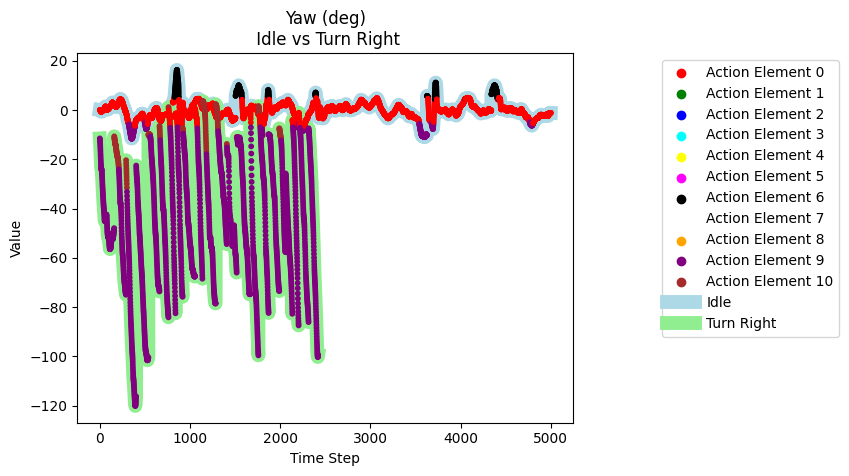

In [30]:
feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration',
           'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)', 'Vehicle Speed']

df = pd.read_csv(f'{train_name_file}.csv')
AutoTag.predict_cluster(df, feature, 'mixed_data/mixed_train_model.pkl', f'{train_name_file}_clustered.csv')
df_clustered = pd.read_csv(f'{train_name_file}_clustered.csv')

else_.Plot_Action_Cluter(df_clustered, 'Idle', 'Turn Right', 'Yaw (deg)', 11, 5000, False)